# Remapping example

In this notebook we will show how to remap a box into a cuboid using Jordan Carlson and Martin White's algorithm of arXiv:1003.3178.

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt

from mockfactory import utils, setup_logging

In [8]:
# First generate a catalog
from mockfactory.make_survey import RandomBoxCatalog
catalog = RandomBoxCatalog(nbar=1e-3, boxsize=1000., boxcenter=(2000., 0., 0.), seed=44)

In [3]:
from mockfactory.remap import Cuboid
lattice = Cuboid.generate_lattice_vectors(maxint=1, maxcomb=1, sort=False, boxsize=catalog.boxsize)
print('Examples of boxsize: lattice vectors {}'.format(lattice))

Examples of boxsize: lattice vectors {(1414.213562373095, 1224.744871391589, 577.3502691896258): [((-1, 0, 1), (-1, 1, 0), (-1, -1, 1))], (1414.213562373095, 1224.744871391589, 577.3502691896257): [((-1, 0, 1), (-1, 1, 0), (-1, 1, -1))], (1414.213562373095, 1000.0, 707.1067811865476): [((-1, 0, 1), (-1, 1, 1), (-1, 1, 0))], (1414.213562373095, 1732.0508075688772, 408.24829046386304): [((-1, 0, 1), (1, -1, 1), (-1, 1, 0))], (1414.213562373095, 1732.0508075688772, 408.248290463863): [((-1, 0, 1), (1, -1, 1), (0, 0, 1))], (1414.213562373095, 707.1067811865476, 1000.0): [((-1, 0, 1), (-1, 0, 0), (0, -1, 1))], (1732.0508075688772, 816.496580927726, 707.1067811865476): [((-1, 1, 1), (-1, 0, 1), (0, -1, 1))], (1732.0508075688772, 816.496580927726, 707.1067811865474): [((-1, 1, 1), (-1, 0, 1), (1, -1, 0))], (1732.0508075688772, 1414.213562373095, 408.24829046386304): [((-1, 1, 1), (0, -1, 1), (1, -1, 0))], (1732.0508075688772, 816.4965809277261, 707.1067811865476): [((-1, 1, 1), (-1, 0, 0), (-

In [4]:
# Instantiate Cuboid
cuboidsize = (1732.0508075688772, 816.496580927726, 707.1067811865476) # this is the remapped box size
u = lattice[cuboidsize][0] # corresponding lattice vectors
cuboid = Cuboid(*u, boxsize=catalog.boxsize)
assert np.allclose(cuboid.cuboidsize, cuboidsize)

In [5]:
# Interlude: Cuboid can be applied directly do a position array:
rng = np.random.RandomState(seed=42)
position = np.array([rng.uniform(0., catalog.boxsize[i], 10) for i in range(3)]).T
# Box -> Cuboid transform
remapped_position = cuboid.transform(position)
assert np.all(remapped_position >= 0.) and np.all(remapped_position <= np.array(cuboidsize))
# Cuboid -> Box transform
inverse_position = cuboid.inverse_transform(remapped_position)
assert np.allclose(position, inverse_position)

In [6]:
# Let's apply remapping to our catalog!
remapped = catalog.remap(*u) # or catalog.remap(cuboid)

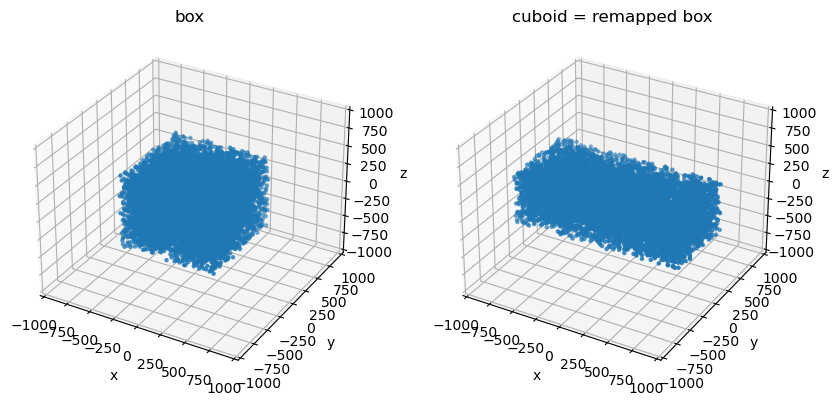

In [7]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121, projection='3d', title='box')
ax.scatter(*catalog['Position'][::100].T, marker='.')
limits = np.array([catalog.boxcenter - catalog.boxsize, catalog.boxcenter + catalog.boxsize]).T
ax.set_xlabel('x'); ax.set_xlim(limits[0])
ax.set_ylabel('y'); ax.set_ylim(limits[1])
ax.set_zlabel('z'); ax.set_zlim(limits[2])
ax = fig.add_subplot(122, projection='3d', title='cuboid = remapped box')
ax.scatter(*remapped['Position'][::100].T, marker='.')
ax.set_xlabel('x'); ax.set_xlim(limits[0])
ax.set_ylabel('y'); ax.set_ylim(limits[1])
ax.set_zlabel('z'); ax.set_zlim(limits[2])
plt.show()